# R Coding Assignment \#9: Markov Chain

### Sheetal Parikh
EN.605.631.81<br>
November 1, 2020
***
***

Suppose the attached voting results called, "Voting Precinct.txt", of the outcome of the congressional election in a certain precinct in the US is collected every two years where the outcome of one election depends only on the results of the preceding election. For example:
<br>
<br>
Year &nbsp;	DEM	&nbsp; REP &nbsp; LIB<br>
1885 &nbsp;&nbsp;&nbsp; D &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; R &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L<br>
1887 &nbsp;&nbsp;&nbsp; D &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; R &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; D<br>
1889 &nbsp;&nbsp;&nbsp;	R &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; R &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;	R<br>
1891 &nbsp;&nbsp;&nbsp; R &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; L &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; R<br>
1893 &nbsp;&nbsp;&nbsp; D &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; R &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;	D<br>
1895 &nbsp;&nbsp;&nbsp; L &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; R &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;	R<br>
1897 &nbsp;&nbsp;&nbsp; L &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; D &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;	R<br>
<br>
In the above table, the first column represents Democrats. From 1885 to 1897 they voted Democrat three times, Republican twice, and Libertarian twice. Similarly, for those who voted Republican, voted Republican five times, and Democratic once and Libertarian once. 
<br>
The sequence that describe the votes every two years may be regarded as a Markov Chain.

## Problem 1
 Determine the transition matrix from the data given in the attached voting precinct file. Your matrix should be square reflecting Democrat, Republicans, and Libertarians. The rows (or columns depending how you setup your problem) should sum to one. The entries in the first row (or column) describe what a person voting Democrat in one election will do in the next election. A similar interpretation holds for the other rows (columns).

In order to determine the transition matrix from the voting precinct file, we need to first calculate the probabilities of moving from one state to the next meaning the probabilities of voting Democrat, Republic, or Libertarian given the voter is registered as a Democrat, Republican or Libertarian.  Below we can see that over 80 years, Democrats voted Democrat 56 times, voted Libertarian 16 times, and voted Republican 8 times.  Republicans voted Democrat 8 times, voted Libertarian 8 times, and voted Republican 64 times.  Lastly Libertarians voted Democrat 24 times, voted Libertarian 32 times, and voted Republican 24 times.

In [15]:
#setting working directory to correct folder to pull in Voting Precinct txt file
setwd("C:/Users/Sheetal/Documents/Sheetal/Stat Methods/Class Code")

#reading in txt file and saving it as a data frame
data <- read.table("Voting Precinct.txt", header = TRUE, sep="")

In [16]:
library(plyr)

#determining the number of years included in the table
years <- nrow(data)
cat("The voting precinct data comprises a total of ", years, " years.")

#determining the number of times Democrats voted Democrat, Republic, and Liberatarian
D_freq <- count(data,"D")
D_freq

#determining the number of times Republicans voted Democrat, Republic, and Liberatarian
R_freq <- count(data,"R")
R_freq

#determining the number of times Libertarians voted Democrat, Republic, and Libertarian
L_freq <- count(data,"L")
L_freq

The voting precinct data comprises a total of  80  years.

D,freq
D,56
L,16
R,8


R,freq
D,8
L,8
R,64


L,freq
D,24
L,32
R,24


After determining the frequencies of a Democrat, Republican, or Libertarian voting a certain way, we can use the frequencies to calcualte the probabilities of each way of voting and put together the transition matrix.  The transition matrix below goes from left to right.  The first row represents the probabilities of a Democrat voting Democrat, Libertarian, and Republican(in that order).  The second row represents the probabilities of a Republican voting in the same order and the third row represents the probabilities of a Libertarian voting in the same order.

In [24]:
#function for calculating transition probabilities
calcprob <- function(x){
    round(x / years,2)
}

In [25]:
####Determining probabilities of moving from Democrat to another state####
#install.packages('diagram')
#library(diagram)

##Democrat to Democrat
#D_D <- round(D_freq[1,2] / years, digits = 3)
D_D <- calcprob(D_freq[1,2])

##Democrat to Republican
#D_R <- round(D_freq[3,2] / years, digits = 3)
D_R <- calcprob(D_freq[3,2])

##Democrat to Libertarian
#D_L <- round(D_freq[2,2] / years, digits = 3)
D_L <- calcprob(D_freq[2,2])

###determining probabilities of moving from Republican to another state###

##Republican to Democrat
#R_D <- round(R_freq[1,2] / years, digits = 3)
R_D <- calcprob(R_freq[1,2])

##Republican to Republican
#R_R <- round(R_freq[3,2] / years, digits = 3)
R_R <- calcprob(R_freq[3,2])

##Republican to Libertarian
#R_L <- round(R_freq[2,2] / years, digits = 3)
R_L <- calcprob(R_freq[2,2])

###determining probabilities of moving from Libertarian to another state###

##Libertarian to Democrat
#L_D <- round(L_freq[1,2] / years, digits = 3)
L_D <- calcprob(L_freq[1,2])

#Libertarian to Republican
#L_R <- round(L_freq[3,2] / years, digits = 3)
L_R <- calcprob(L_freq[3,2])

#Libertarian to Libertarian
#L_L <- round(L_freq[2,2] / years, digits = 3)
L_L <- calcprob(L_freq[2,2])

#####Putting together the Transition Matrix#####

#printing matrix to view the probability of each state and the probability to transition to a different state
t_Mat_visual <- matrix(c("", "D", "R", "L", "D", D_D, D_R, D_L, "R", R_D, R_R, R_L, "L", L_D, L_R, L_L), nrow = 4, byrow = TRUE)
cat("3 Dimensional Discrete Markov Chain defined by three states:\n")
cat("    Democrat(D), Republican(R) and Libertarian(L)\n")
cat("\nThe transition matrix (by rows) is defined as follows:\n")
##  A  3 - dimensional discrete Markov Chain defined by the following states: 
##  No Rain, Light Rain, Heavy Rain 
##  The transition matrix  (by rows)  is defined as follows: 
t_Mat_visual

#printing matrix that will be used to for calculations going forward
t_mat <- matrix(c(D_D, D_R, D_L, R_D, R_R, R_L, L_D, L_R, L_L), nrow = 3, byrow = TRUE)
cat("Matrix that will be used for calculations:\n")
t_mat


3 Dimensional Discrete Markov Chain defined by three states:
    Democrat(D), Republican(R) and Libertarian(L)

The transition matrix (by rows) is defined as follows:


,D,R,L
D,0.7,0.1,0.2
R,0.1,0.8,0.1
L,0.3,0.3,0.4


Matrix that will be used for calculations:


0.7,0.1,0.2
0.1,0.8,0.1
0.3,0.3,0.4


## Problem 2
Produce a diagram for the transition matrix derived in problem 1.

The diagram below shows the flow of moving from one state to another.  For example, if a voter is at the Democrat state (meaning that he or she is democrat), there is a 70% probability that he or she will vote Democrat, or stay in the Democrat state. There also is a 10% probability of that voter voting Republican, or moving to the Republican state, and a 20% probability of that voter voting Libertarian or moving to the Libertarian state.

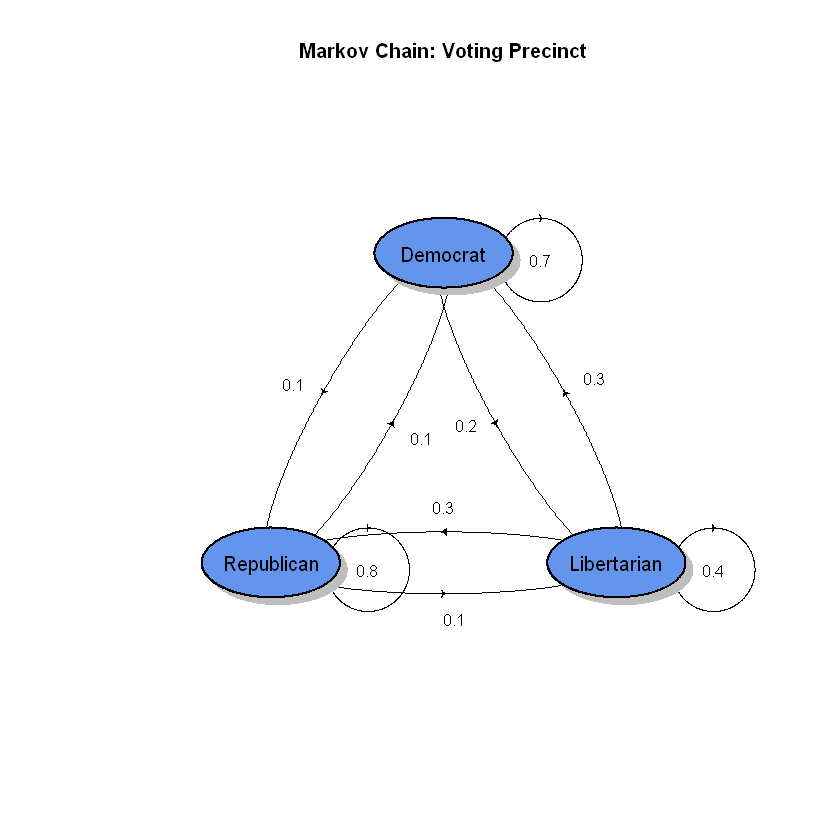

In [30]:
library(diagram)

#transpose matrix
t_mat_2 <- t(t_mat)

stateNames <- c("Democrat","Republican","Libertarian")
row.names(t_mat_2) <- stateNames; colnames(t_mat_2) <- stateNames
plotmat(t_mat_2,pos = c(1,2), 
        lwd = 1, box.lwd = 2, 
        cex.txt = 0.8, 
        box.size = 0.1, 
        box.type = "circle", 
        box.prop = 0.5,
        box.col = "cornflowerblue",
        arr.length=.1,
        arr.width=.1,
        self.cex = .6,
        self.shifty = -.01,
        self.shiftx = .14,
        main = "Markov Chain: Voting Precinct")

We can also simulate multiple chains of over multiple iterations to get a sense of how the markov chain would flow using the transition matrix we determined above.  The graph below demonstrates 100 iterations of 5 chains of the transition matrix we determined. 

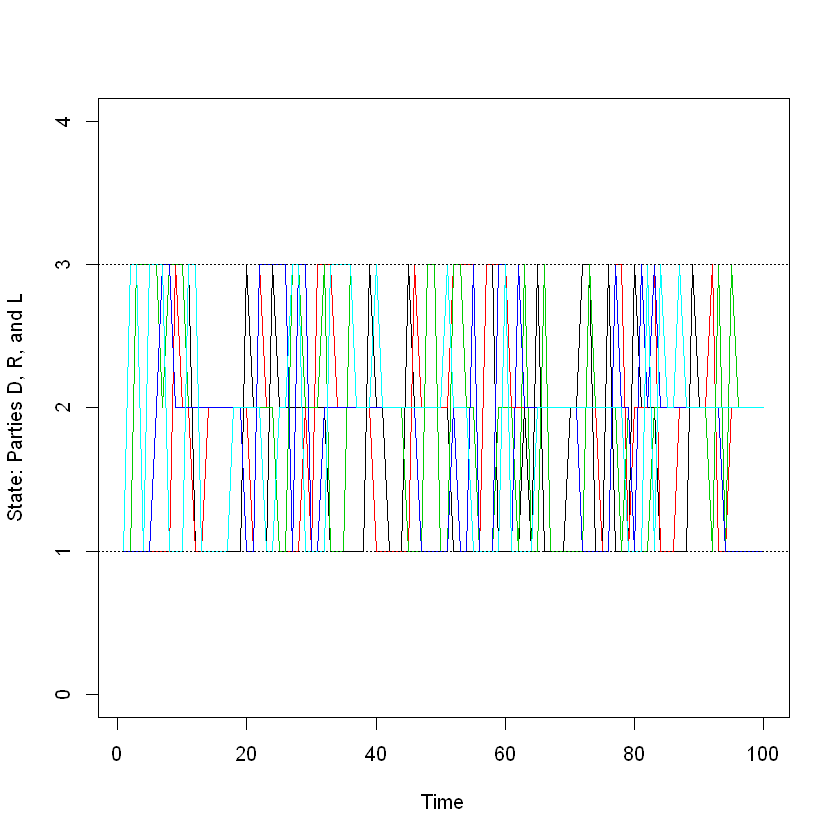

In [31]:
#https://stephens999.github.io/fiveMinuteStats/simulating_discrete_chains_1.html

# simulate discrete Markov chains according to transition matrix 
markovsimulation <- function( m, iterations = 100 ) {
  
  # number states
  num_states <- nrow(m)
  
  # stores the states X_t through time
  states     <- numeric(iterations)

  # initialize variable for first state 
  states[1]    <- 1

  for(t in 2:iterations) {
    
    # probability vector to simulate next state X_{t+1}
    prob_vec  <- m[states[t-1], ]
    
    ## draw from multinomial and determine state
    states[t] <-  which(rmultinom(1, 1, prob_vec) == 1)
  }
  return(states)
}

num_chains     <- 5
num_iterations <- 100

# each column stores the sequence of states for a single chain
chain_states  <- matrix(NA, ncol=num_chains, nrow=num_iterations)

# simulate chains
for(c in seq_len(num_chains)){
  chain_states[,c] <- markovsimulation(t_mat)
}

# plotting graph
matplot(chain_states, type='l', lty=1, col=1:5, ylim=c(0,4), ylab='State: Parties D, R, and L', xlab='Time')
abline(h=1, lty=3)
abline(h=3, lty=3)

## Problem 3
Suppose out of 1000 voters the outcome of one election is given by 55% Democrat, 40% Republican, and 5% Libertarian. Determine how many voters will cast by party the next election, then determine the election by party after that

We are given an intitial state vector from the current election (at t = 1).  In order to determine how many voters will vote Democrat, Republican or Libertarian the next election, we would muliply the initial state vector with the voter transition matrix we determined in problem 1 taken to the second power (t = 2). This would give us the probabilities which we can then use to determine the numbers of Democrat voters(approximately 398 voters), the Number of Republicans voters(Approximately 407 voters) and the number of Libertarian voters(approximately 195 voters).  Similarly, in order to determine how many voters will vote Democrat, Republican or Libertarian the election after next, we would muliply the initial state vector with the voter transition matrix we determined in problem 1 taken to the third power (t = 3). This would give us the probabilities which we can then use to determine the numbers of Democrat voters(approximately 378 voters), the Number of Republicans voters(Approximately 424 voters) and the number of Libertarian voters(approximately 198 voters).

In [33]:
#install.packages("matrixcalc")
library(matrixcalc)
library(expm)

#1000 voters
num_voters <- 1000

#percentages of voters by party of current election at t = 1
Dem <- 0.55
Rep <- 0.40
Lib <- 0.05

initialstate <- c(Dem, Rep, Lib)
#initialstate
                 
#next election: t = 2
election2 <- initialstate %*% (t_mat %^% 2)
cat("Probabilities by party for next election in order of D,R, and L: \n")
election2
cat("Approximate Number of Voters Cast By Party for next election(t=2):\n")
cat("Democrats:", election2[1,1]*num_voters, "\nRepublicans:", election2[1,2]*num_voters, 
    "\nLibertarian:",election2[1,3]*num_voters)

#election after next: t = 3
election3 <- initialstate %*% (t_mat %^% 3)
cat("\n\nProbabilities by party for election after next in order of D, R, and L: \n")
election3
cat("Approximate Number of Voters Cast By Party for election after next(t=3):\n")
cat("Democrats:", round(election3[1,1]*num_voters,0), "\nRepublicans:", round(election3[1,2]*num_voters,0), 
    "\nLibertarian:", round(election3[1,3]*num_voters,0))


Probabilities by party for next election in order of D,R, and L: 


0.398,0.407,0.195


Approximate Number of Voters Cast By Party for next election(t=2):
Democrats: 398 
Republicans: 407 
Libertarian: 195

Probabilities by party for election after next in order of D, R, and L: 


0.3778,0.4239,0.1983


Approximate Number of Voters Cast By Party for election after next(t=3):
Democrats: 378 
Republicans: 424 
Libertarian: 198

## Problem 4
Determine the steady state of the transition matrix.

After so many steps into the future (after taking the n power of a transition matrix, as n approaches a greater and greater value) we will see that the resulting probabilities will stop changing(no matter how many steps into the future).  This steady resulting  matrix will be the steady state of the transition matrix.  As seen below, the resulting steady state is [0.3462, 0.4615, 0.1923], meaning after so many elections we would have the outcome of a election be steady at 35% Democrat, 46% Republican, and 19% Libertarian (using the transition matrix determined in problem 1).

In [29]:
#function for taking the n power of a transition matrix and printing it
future_elections <- function(matrix, n) {
    mat_n <- matrix.power(matrix, n)
    cat(n, "Elections in the future: \n")
    mat_n
}

future_elections(t_mat,10)

future_elections(t_mat,50)

future_elections(t_mat,100)

steadystate <- matrix(c(0.3462, 0.4615, 0.1923), nrow = 1, byrow = TRUE)
                 
cat("Steady State Matrix: \n")
steadystate

10 Elections in the future: 


0.3531292,0.4526049,0.1942659
0.3403506,0.4689712,0.1906782
0.3475260,0.4597803,0.1926936


50 Elections in the future: 


0.3461538,0.4615385,0.1923077
0.3461538,0.4615385,0.1923077
0.3461538,0.4615385,0.1923077


100 Elections in the future: 


0.3461538,0.4615385,0.1923077
0.3461538,0.4615385,0.1923077
0.3461538,0.4615385,0.1923077


Steady State Matrix: 


0.3462,0.4615,0.1923


## References

https://rpubs.com/JanpuHou/326048

http://www.math.bas.bg/~jeni/markov123.pdf

https://stephens999.github.io/fiveMinuteStats/simulating_discrete_chains_1.html